## NumPy and Matplotlib (By Example)

### DATA 601

**By: Usman Alim** 

Further Reading:

* **Python for Data Analysis** (second edition), by _Wes McKinney_ (Chapter 4). ([Library link](https://ucalgary-primo.hosted.exlibrisgroup.com/primo-explore/fulldisplay?docid=01UCALG_ALMA51642853910004336&context=L&vid=UCALGARY&search_scope=EVERYTHING&tab=everything&lang=en_US) for book)
* **[NumPy User Guide](https://numpy.org/devdocs/user/index.html)**
* **[Matplotlib User's Guide](https://matplotlib.org/users/index.html)**


## Topics

- [Introduction to NumPy](#numpy)
- [Slicing](#slicing)
- [Indexing](#indexing)
- [Vectorized computation](#vectorization)
- [Example: Computing simple statistics on arrays (_histograms_)  ](#stats)
- [Example: Basic linear algebra (_scatter plots_ and _density plots_ )](#linalg)
- [Exercise: Working with text data](#exercise)

In [1]:
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import matplotlib.pyplot as plt
print(np.__version__)
print(mpl.__version__)

1.22.4
3.5.3


## <a name="numpy"></a>NumPy

- NumPy (Numerical Python) is the main library for scientific computing in Python.
- Mature and popular, the convenience of Python but the speed of C/C++.
- At the core is the multi-dimensional array: `ndarray`.
- Mathematical operations for operating on entire arrays of data (*vectorization*).
- Linear algebra and random number generation routines.

In [70]:
art = np.random.rand(5)
ar2t = np.random.rand(3,3) # 3 rows, 3 columns
print(ar2t.dtype)
print(art,'\n')
print(ar2t,"\n")

arrt = np.array([1, 2, 9]) 
print(arrt.dtype)
print(arrt,'\n')

arr2t = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 99]])
print(arr2t) 

print(np.eye(4),"\n")

print(np.zeros((3,2,3)))

float64
[0.00274783 0.13208412 0.94687528 0.32117468 0.91104092] 

[[0.99260944 0.04537858 0.97957811]
 [0.24508843 0.01587668 0.75119962]
 [0.89862664 0.30851337 0.75073849]] 

int64
[1 2 9] 

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8 99]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]] 

[[[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]]


In [3]:
# importing numpy and creating ndarrays. It's de rigueur to import
# numpy as np

import numpy as np
ar = np.random.rand(3) # 1d array
ar2 = np.random.rand(3,3) # 3 rows, 3 columns
print(ar.dtype) #how numpy look up for types
print(ar)
print("\n")
print(ar2)

# We can create ndarrays from lists
arr = np.array([1, 2, 3])
print(arr.dtype)
print("\n")

# For a 2D array, each row is a nested list
arr2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr2) 

# Some other useful arrays

# identity matrix
I = np.eye(3) 
print(I)

# array of all zeros of specified shape
Z = np.zeros((3,3,3))

print("\n")
print(Z)


float64
[0.82335715 0.00349565 0.03730153]


[[0.17880068 0.6326497  0.38048107]
 [0.51245845 0.32252141 0.50101719]
 [0.84474266 0.20231067 0.16013821]]
int32


[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


### NumPy Scalar Types

- A number of scalar data types (`dtype`) are available.


- `int8`, `uint8`: 8-bit signed and unsigned integers. <br>
  Also `int16`,`uint16`, `int32`, `uint32`, and `int64`, `uint64`.


- `float32`: Single-precision floating point. <br>
  Also `float16` (half-precision) and `float64` (double-precision). <br>
  `float64` is compatible with Python's `float`.


- And there are others:<br>
  `complex64`, `complex128`, `complex256` <br>
  `bool`, `object`, `string_`, `unicode_`
  
  
- For many applications, the default types will suffice.

In [33]:
# Arithmetic operations on ndarrays are performed element-wise.
# Think matrices

A = np.eye(3)
B = np.eye(3)
C = A + B
D = A - B
 
print(C)
print(D)
print("\n")

# Multiplication and division are also element-wise
X = np.array([[1,2,3],[4,5,6], [7,8,9]])
print(X * X)
print(X / X)
print("\n")

[[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


[[ 1  4  9]
 [16 25 36]
 [49 64 81]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]




In [42]:
# Operations with scalars propagate the scalar to all elements
print(A,"this is A")

print(X,"this is X")

print(1 - A)
print()


print(1.0 + A)
print(0.5 * A)
print(X ** 0.5)
print("\n")

# Can do element-wise comparisons
print(X > A)
print(X == A)
print("\n")

# Build arithmetic expressions
print(A ** 2 + (1 - A) ** 2)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] this is A
[[1 2 3]
 [4 5 6]
 [7 8 9]] this is X
[[0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]

[[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]]
[[0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  0.5]]
[[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]
 [2.64575131 2.82842712 3.        ]]


[[False  True  True]
 [ True  True  True]
 [ True  True  True]]
[[ True False False]
 [False False False]
 [False False False]]


[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


## <a name="slicing"></a>Slicing

In [69]:
# Array indexing and slicing in 1D is similar to lists.
# However, note that data is not copied, the original array
# is modified. NumPy provides additional indexing capabilities such
# as broadcasting and boolean indexing in n-dimensions.

arr = np.arange(10)
arr2 = arr[0:4] # serves as an alias
#arr2 is not a copy, making changes in arr2, arr will change aswell.
print(arr)
print(arr2)
print("\n")

arr2[1] = 0
print(arr)
print(arr2)

# Broadcast example
arr[5:10] = 5
print(arr)

arr[5:10] = [10,11,13,14,15]
print(arr)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3]


[0 0 2 3 4 5 6 7 8 9]
[0 0 2 3]
[0 0 2 3 4 5 5 5 5 5]
[ 0  0  2  3  4 10 11 13 14 15]


In [6]:
# Familiar list slicing extends to multiple dimensions
# Recall that slices are views.
import numpy as np

a = np.random.rand(3,3)
print(a) 
av = a[0:2,0:2]
print(av)
av[:] = 0

print(av)
print(a)

[[0.85620081 0.47310484 0.45955742]
 [0.67190507 0.97955278 0.69129016]
 [0.67623357 0.96230413 0.62087512]]
[[0.85620081 0.47310484]
 [0.67190507 0.97955278]]
[[0. 0.]
 [0. 0.]]
[[0.         0.         0.45955742]
 [0.         0.         0.69129016]
 [0.67623357 0.96230413 0.62087512]]


In [72]:
# We can extract a sub matrix out of a matrix
A = np.ones((5,5))
print(A,"\n")
A[0::2, 0::2] = 0
print(A)
print("\n")

# access a particular row
print(A[0,:])
print("\n")

# or a particular column
print(A[:,3])
A[:,3] = -1
print(A)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]] 

[[0. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1.]
 [0. 1. 0. 1. 0.]
 [1. 1. 1. 1. 1.]
 [0. 1. 0. 1. 0.]]


[0. 1. 0. 1. 0.]


[1. 1. 1. 1. 1.]
[[ 0.  1.  0. -1.  0.]
 [ 1.  1.  1. -1.  1.]
 [ 0.  1.  0. -1.  0.]
 [ 1.  1.  1. -1.  1.]
 [ 0.  1.  0. -1.  0.]]


## <a name="indexing"></a>Indexing

In [73]:
# Boolean indexing is a way to select data that satisfy a 
# particular condition.

nums = np.random.randn(5)
print(nums)

mask = nums < 0
print(mask)

# mask can be used to get data
negs = nums[mask] # This creates a copy, when true print, false pass
print(negs)

# We can also do
negs = nums[nums < 0]
print(negs)

negs[:] = 0 
#blool(t,f) indexing dont change
print(nums)
print(negs)

# We can also use boolean indexing to set data
nums[nums < 0] = -1
print(nums)

[-0.14562968 -2.41051192 -0.52225492  0.97060676  0.71811622]
[ True  True  True False False]
[-0.14562968 -2.41051192 -0.52225492]
[-0.14562968 -2.41051192 -0.52225492]
[-0.14562968 -2.41051192 -0.52225492  0.97060676  0.71811622]
[0. 0. 0.]
[-1.         -1.         -1.          0.97060676  0.71811622]


In [78]:
# We can pass in a list of indices. This is known as fancy indexing.
# It works in any dimension
print(np.arange(0,24),"\n")
A = np.reshape(np.arange(0,24),(4,6))
print(A)
print(A[[1,3],[3,5]]) #find 2 points, (col index, row index）


print("\n")

# We can also assign via fancy indexing

A[[1,3],[3,5]] = -1
print(A)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] 

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
[ 9 23]


[[ 0  1  2  3  4  5]
 [ 6  7  8 -1 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 -1]]


## <a name="vectorization"></a>Vectorizaton

- Vectorization is the process of operating on entire arrays rather than individual elements. 
- Processors have vectorized instructions which speed up these operations.
- Vectorized functions in NumPy execute much faster as they take advantage of acceleration available at the hardware level.
- Vectorization mantra: _Forget loops, think of the entire array._


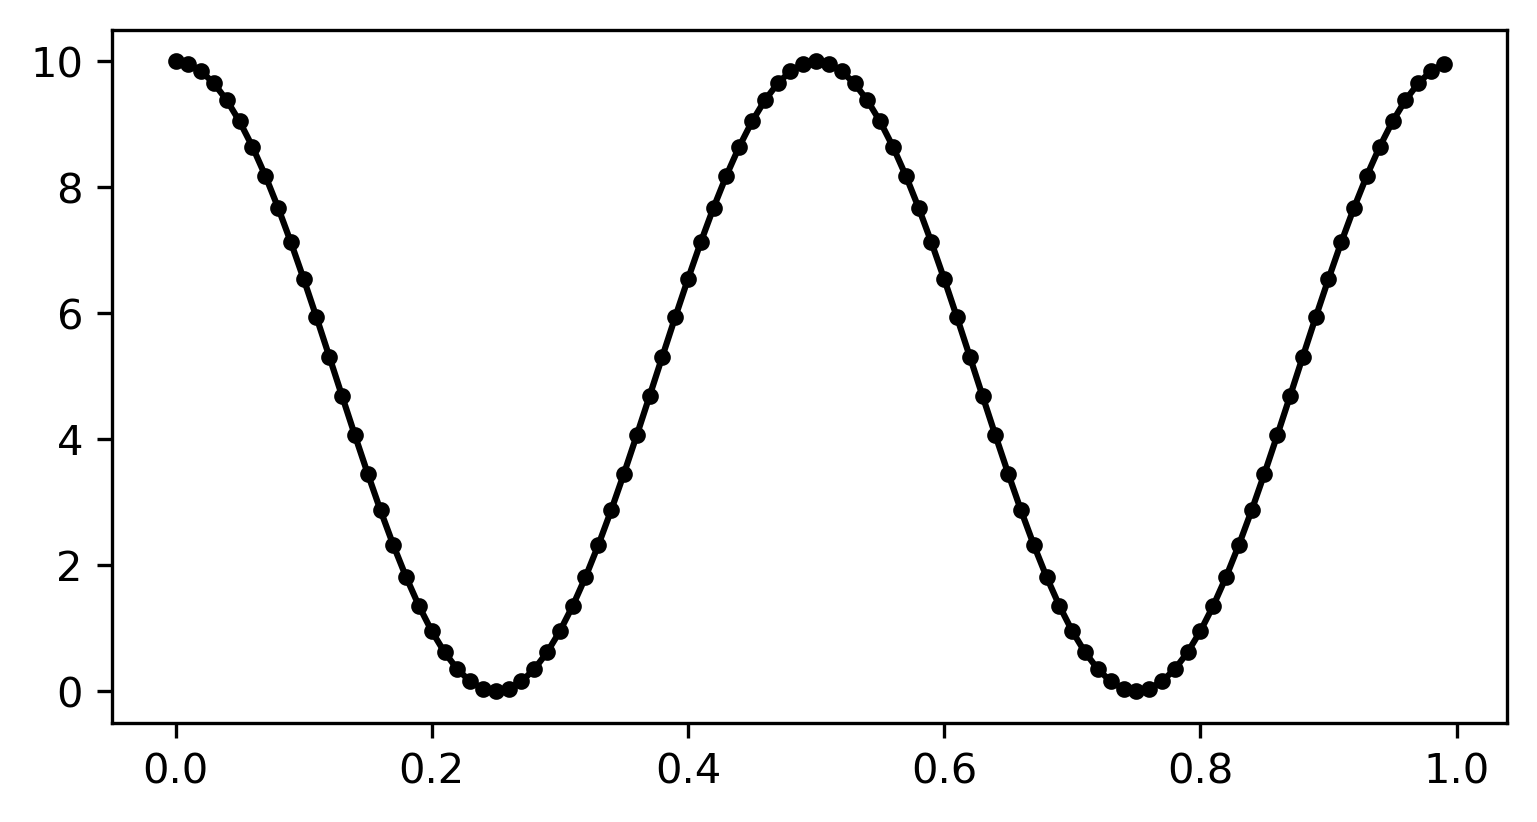

In [67]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

x = np.arange(0,1,0.01)
y1 = 10 * np.cos(2 * np.pi * x)
y2 = 10 * (np.cos(2 * np.pi * x))**2
plt.plot(x, y2, 'k.-',label='someting')
#plt.legend();
fig.set_size_inches(6,3)
plt.show()



[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


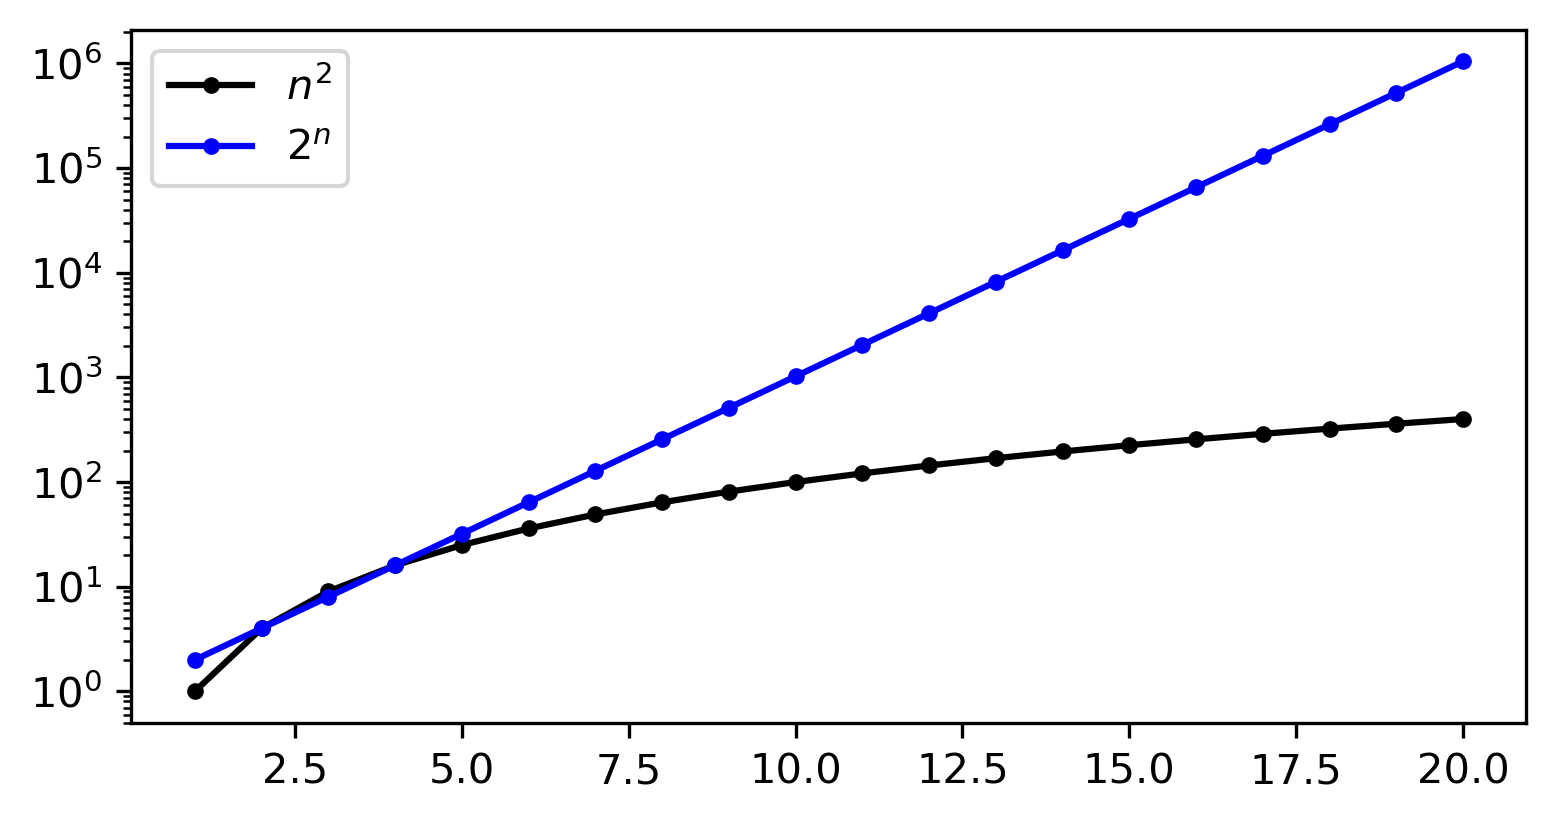

In [45]:
# Example: Math functions on entire arrays
# Note that numpy also has matplotlib integration, i.e. 
# we can pass numpy arrays to matplotlib.


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
n = np.arange(1,21)
print(n)
plt.semilogy( n, n**2 ,'k.-', label='$n^2$')
plt.semilogy( n, np.power(2,n) ,'b.-', label='$2^n$')
plt.legend();
fig.set_size_inches(6,3)
plt.show()


## <a name="stats"></a>Example: Computing statistics on a 1D array

Mean = -0.004960991320842646
STD = 1.0013438043642255


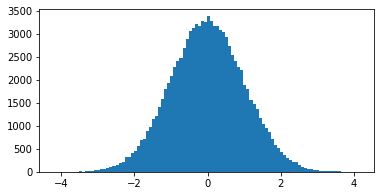

In [11]:
# Stats on a 1D array

X = np.random.randn(100000)
print("Mean = " + str(X.mean()))
print("STD = " + str(X.std()))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.hist(X, bins=100)
fig.set_size_inches(6,3)
plt.show()

In [12]:
# Stats on a 2D array
X = np.reshape(np.arange(100),[5,20])
print(X)

# Can print mean for the entire 2D array
print(X.mean())
print("\n")

# or for a particular axis
mean0 = X.mean(axis=0) #go down the rows gets mean
mean1 = X.mean(axis=1)
print(mean0)
print(mean1)




[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]]
49.5


[40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57.
 58. 59.]
[ 9.5 29.5 49.5 69.5 89.5]


## <a name="linalg"></a>Linear Algebra Example: Transforming Bivariate Data

- Generate points in 2D drawn from a bivariate normal distribution
- Plot a scatter plot of the data
- Plot a 2D histogram of the data
- Transform points by applying a 2D transformation matrix
- Plot a scatter plot of the transformed points



[[ 0.84659148  0.53366241  0.07375993 -1.74707734 -0.88887121]
 [-1.59565994 -0.05486119 -1.23231059  0.30906937 -0.35016397]]


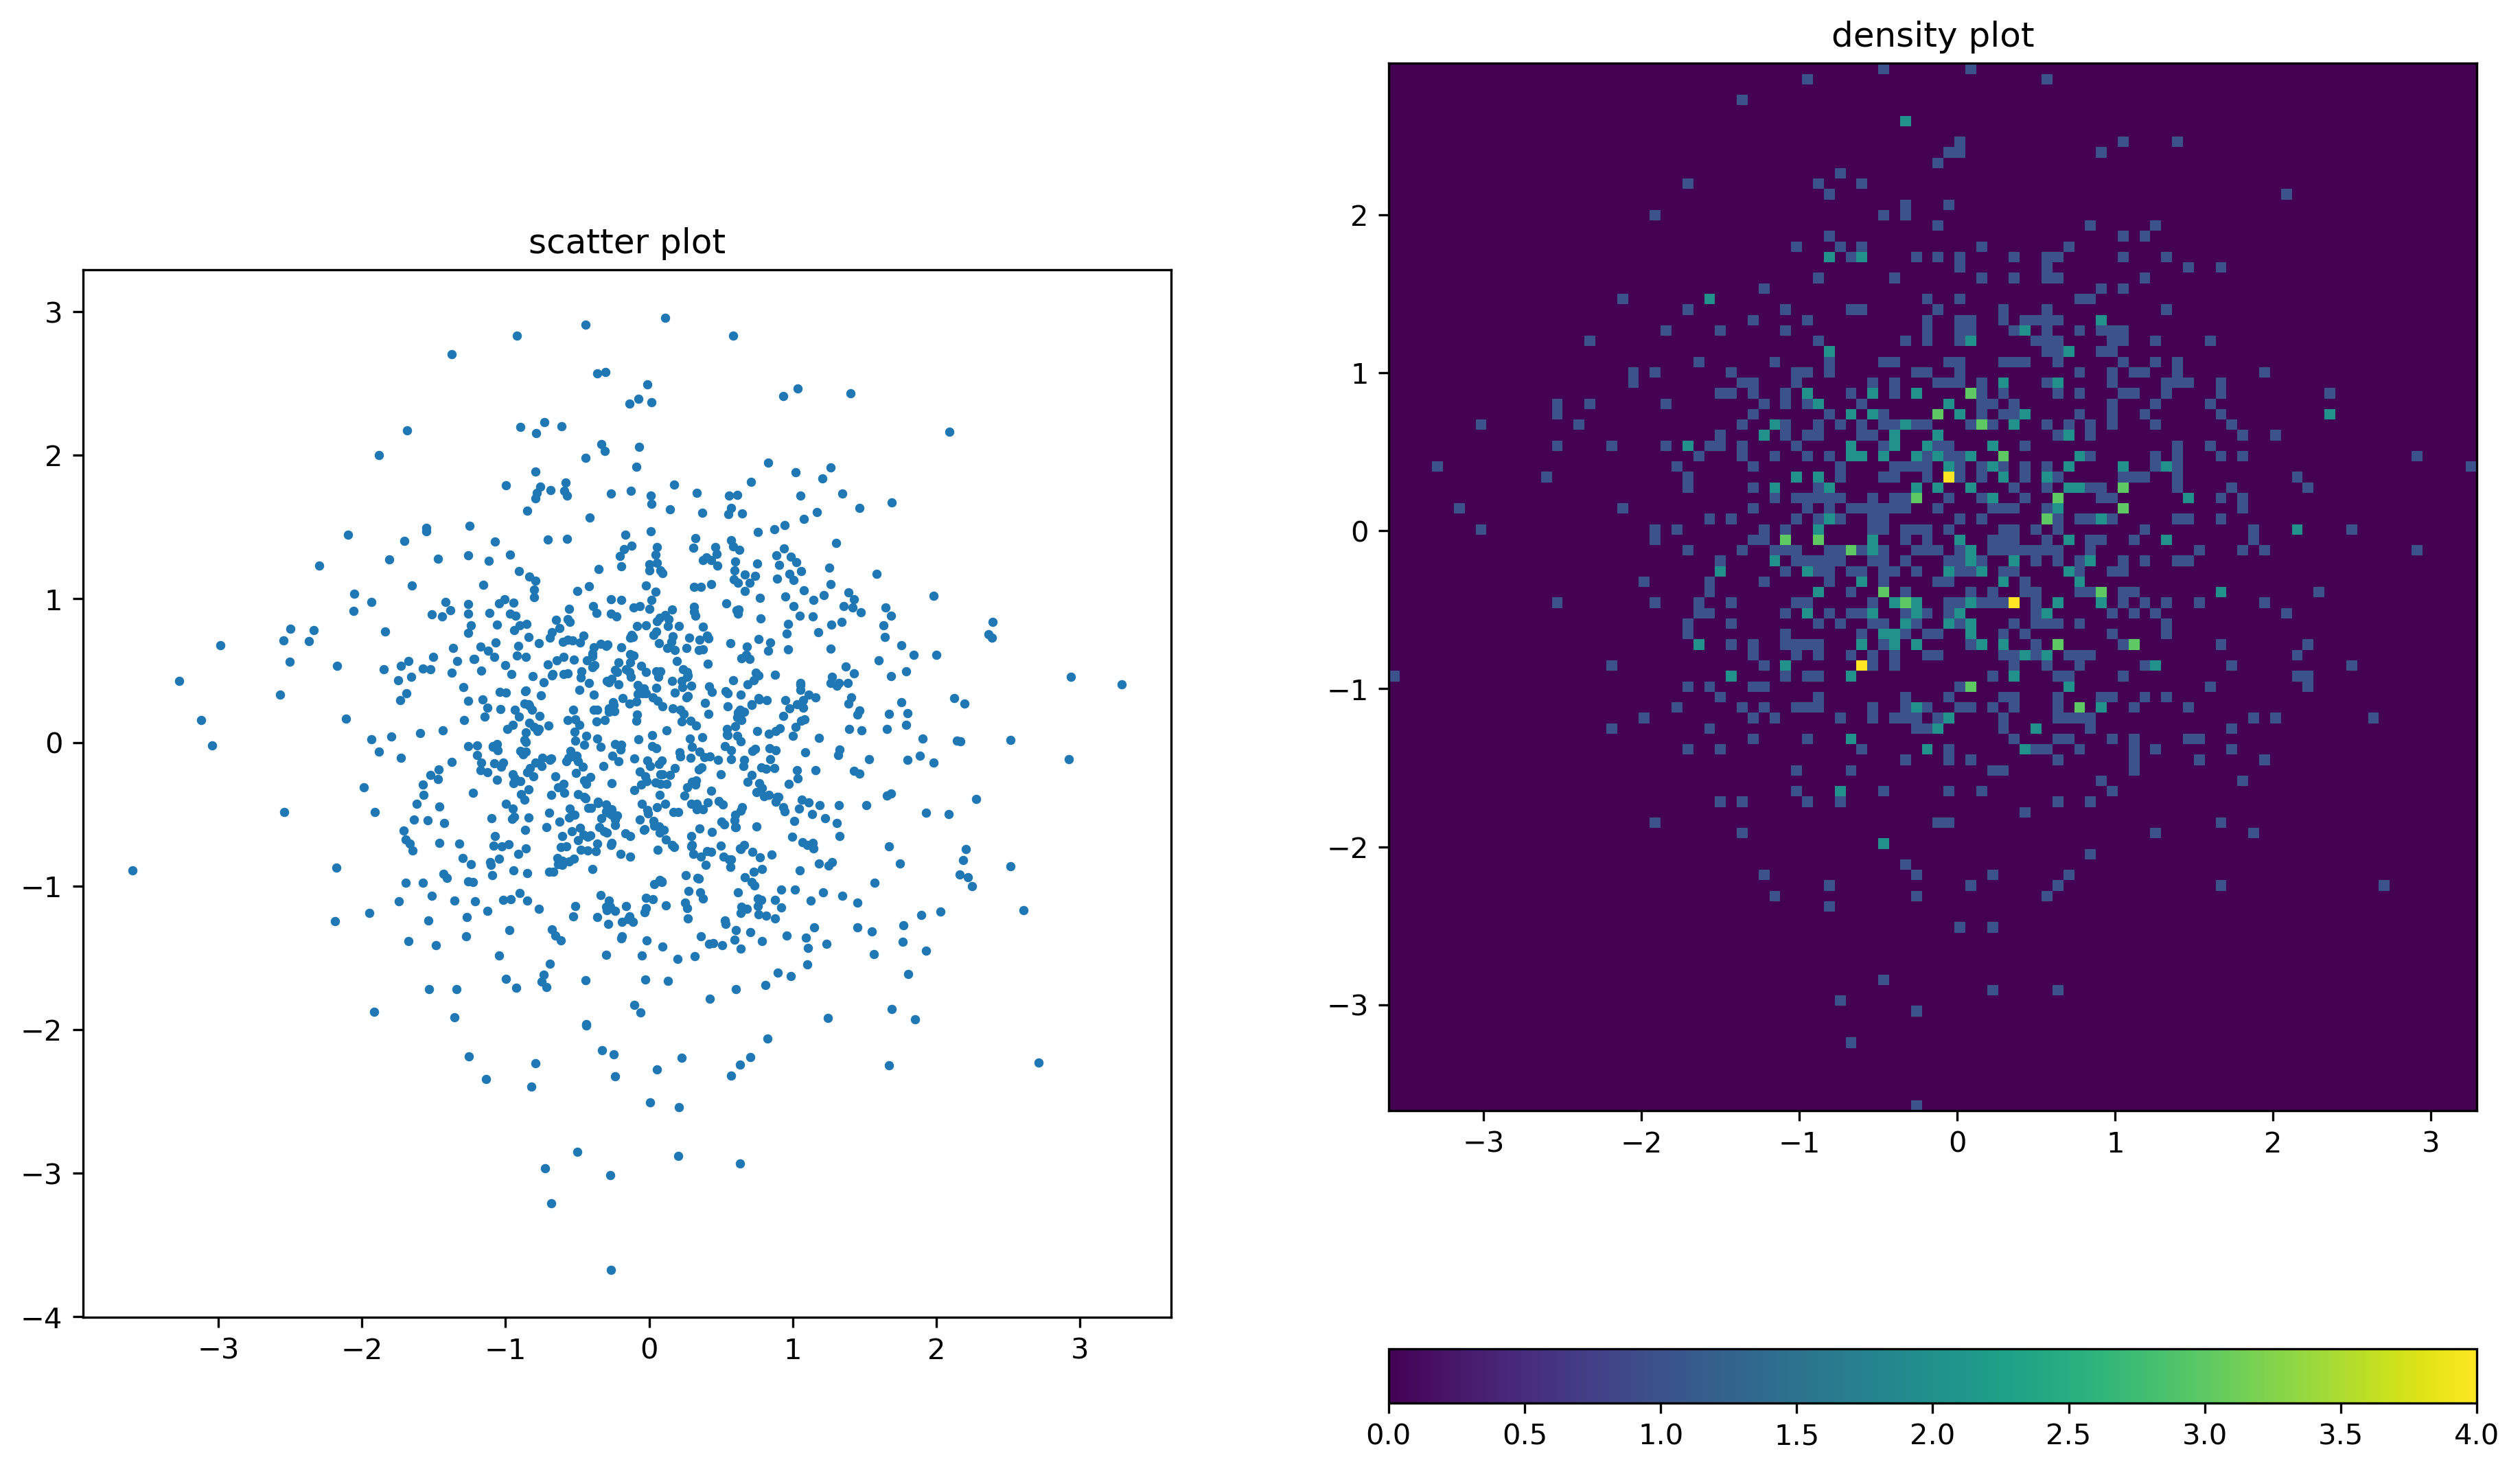

In [86]:


N = 1000
points = np.random.randn(2,N)
print(np.random.randn(2,5))
# We can do a scatter plot and 2D histogram (density plot)
# through matplotlib
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
plt.scatter(points[0,:], points[1,:], s=5)
ax1.set_aspect('equal', 'box')
ax1.set_title('scatter plot')

ax2 = fig.add_subplot(1,2,2)
plt.hist2d(points[0,:], points[1,:], bins=100)
ax2.set_aspect('equal', 'box')
ax2.set_title('density plot')
plt.colorbar(orientation='horizontal')

fig.set_size_inches(15,10)
plt.show()


[[1 2]
 [2 1]]


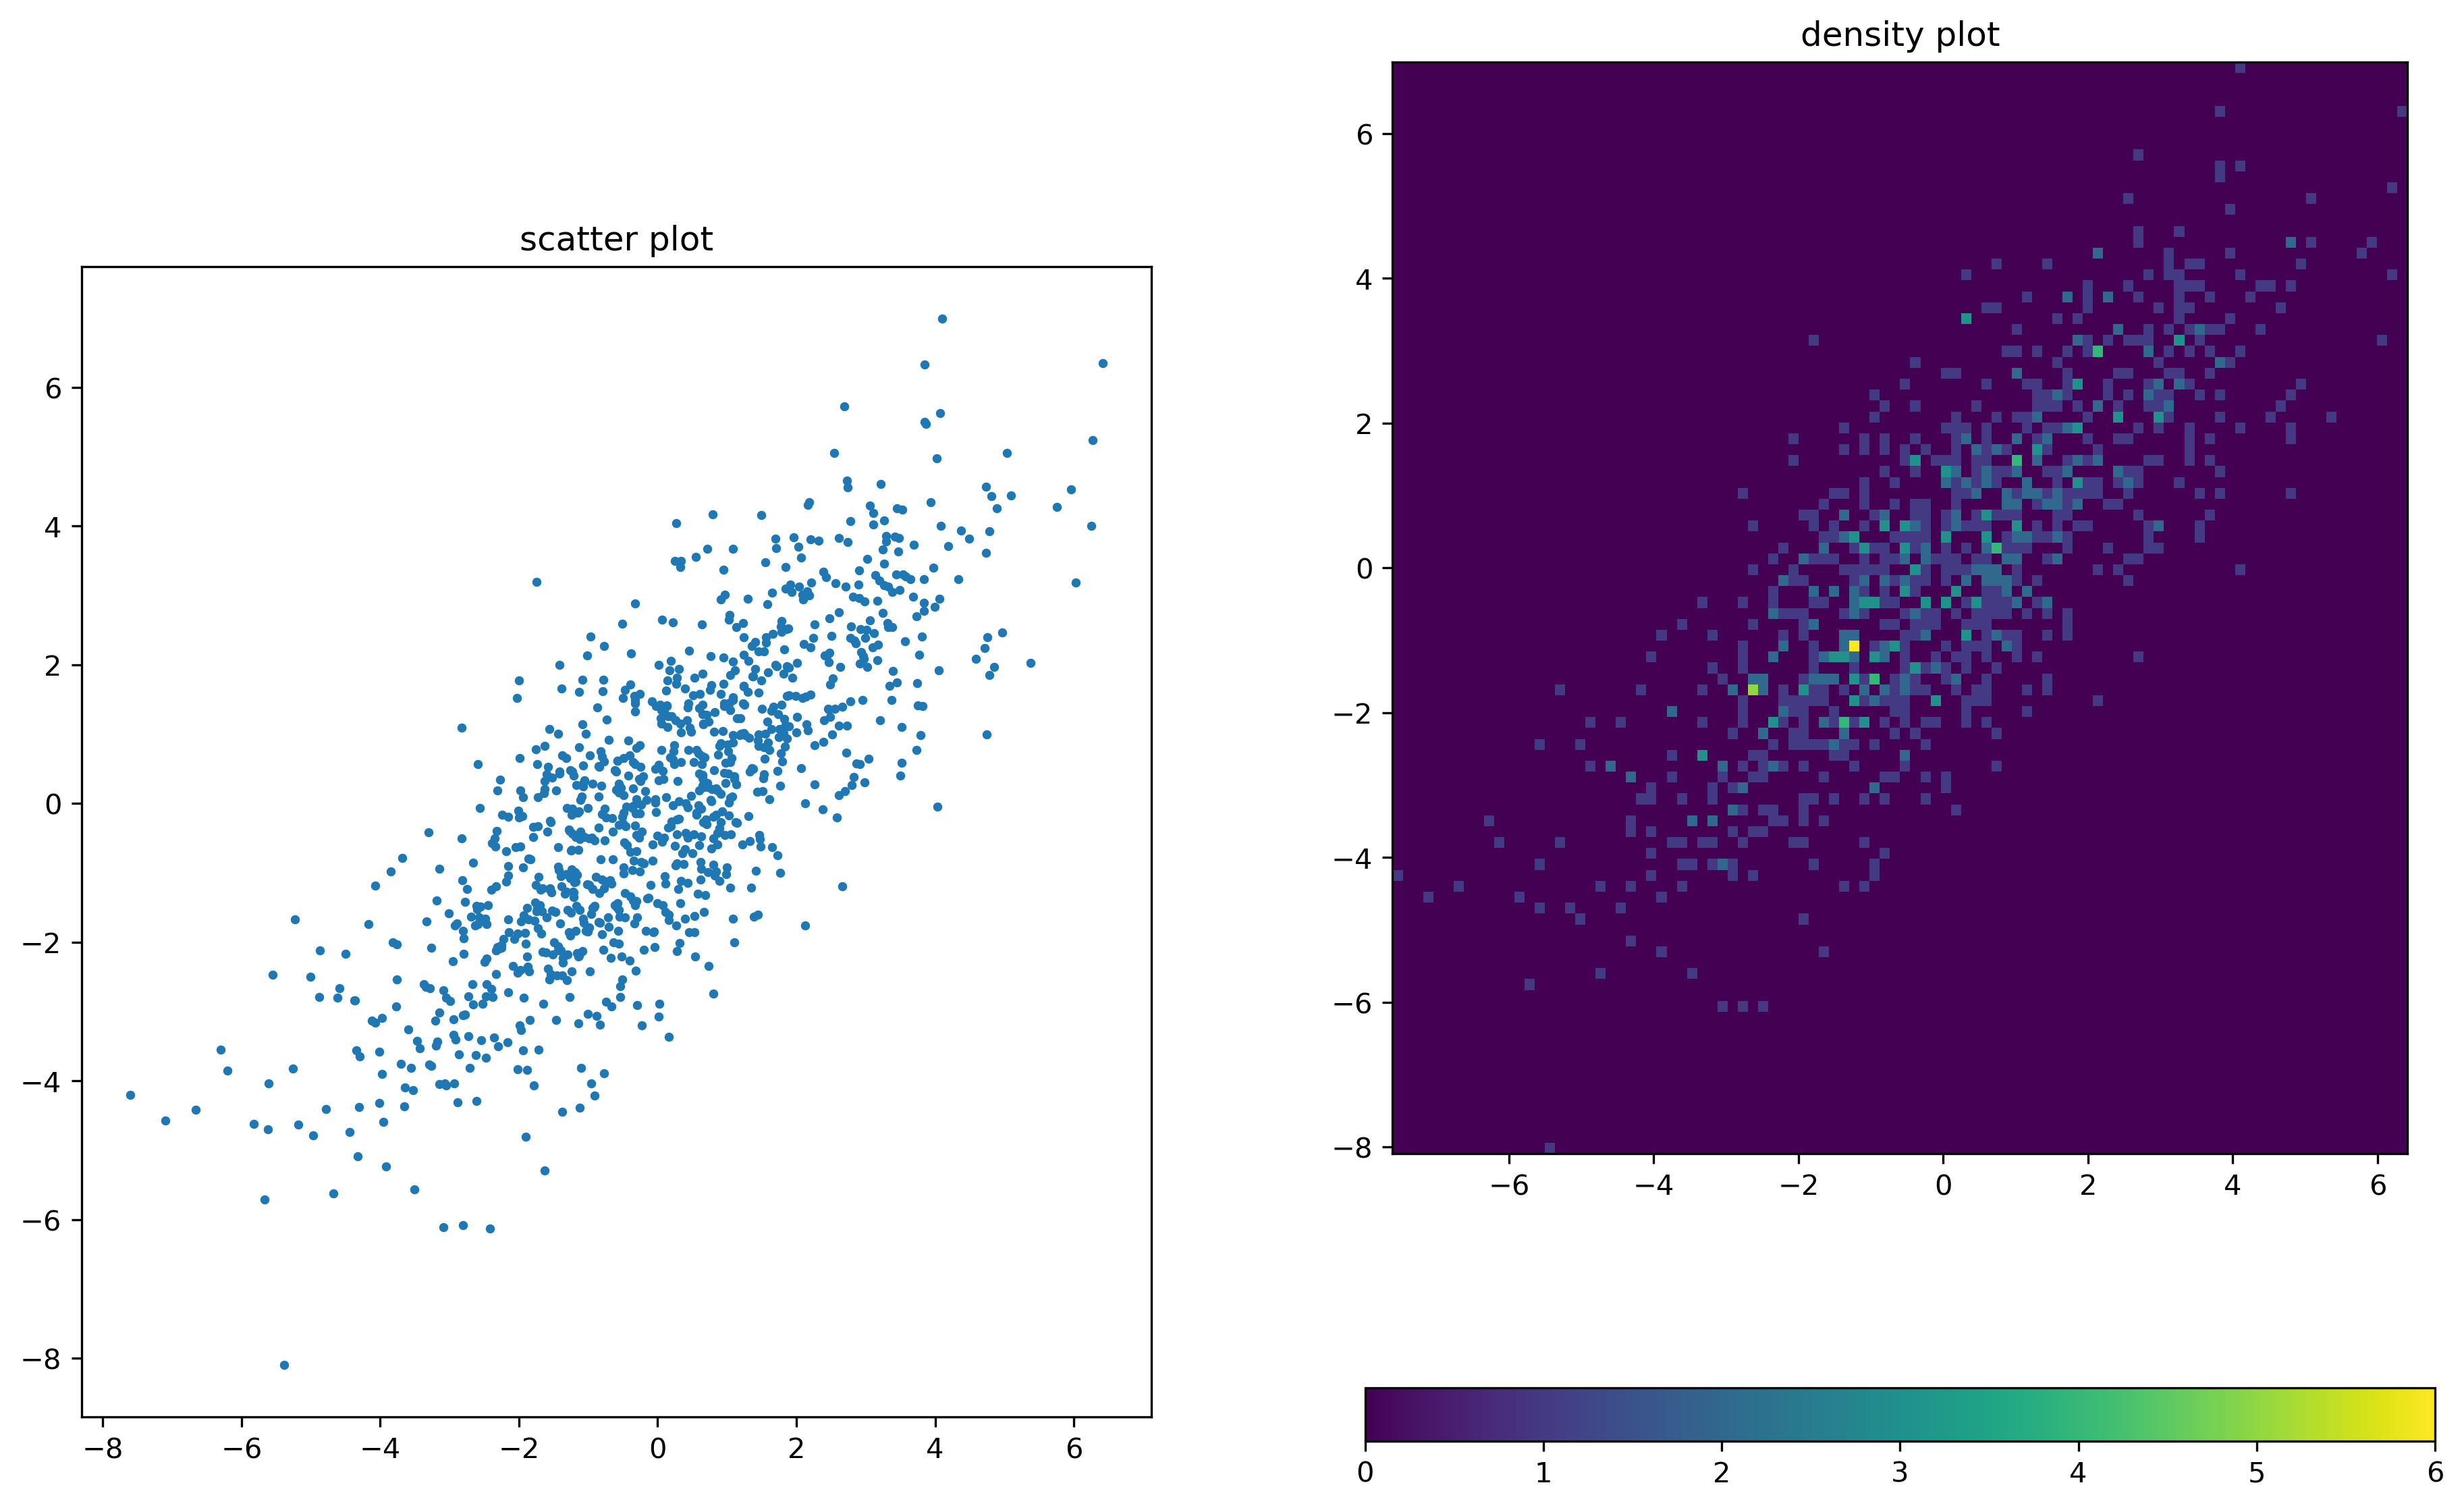

In [87]:
# Now let us transform the data and plot again
# We will do this by doing a matrix-matrix multiplication

M = np.array([[1,2],[2,1]])
print(M)
#tpoints = M.dot(points)
tpoints = M @ points
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
plt.scatter(tpoints[0,:], tpoints[1,:], s=5)
ax1.set_aspect('equal', 'box')
ax1.set_title('scatter plot')

ax2 = fig.add_subplot(1,2,2)
plt.hist2d(tpoints[0,:], tpoints[1,:], bins=100)
ax2.set_aspect('equal', 'box')
plt.colorbar(orientation='horizontal')
ax2.set_title('density plot')

fig.set_size_inches(15,10)
plt.show()

## <a name="exercise"></a>Exercise: Working with Text Data

- Use the function below to read the file 'responses.txt' into a Python list.
- Convert the list to a NumPy array and clean it up using appropriate [NumPy String functions](https://numpy.org/doc/stable/reference/routines.char.html):
  - get rid of empty entries
  - convert everything to lower case
  - get rid of leading and trailing whitespace characters
- Use appropriate [NumPy functions](https://numpy.org/doc/stable/reference/routines.array-manipulation.html) to perform a tally of all the unique responses.
- Use matplotlib to visualize the result.


In [113]:
def freadToList(fname, sep='\n'):
    file = open(fname, 'rt', encoding='utf8')
    text = file.read()
    file.close()
    # split based on provided separator
    return text.split(sep=sep)

In [114]:
text = freadToList('responses.txt')

In [115]:
print(type(text))
print(text[-10:])


<class 'list'>
['Power BI', 'Tableau', 'R', 'Python', 'SQL', '', '', '', '', '']


In [122]:
text = list(filter(None, text))
print(text[-10:])

arrtext = np.array(text)
arrtext = np.char.lower(arrtext)
print(arrtext[-10:])



['SQL', 'Data warehousing', 'Automation of Machine Learning', 'Feedback loops', 'Rapidminer', 'Power BI', 'Tableau', 'R', 'Python', 'SQL']
['sql' 'data warehousing' 'automation of machine learning'
 'feedback loops' 'rapidminer' 'power bi' 'tableau' 'r' 'python' 'sql']


In [ ]:
text1 = f